Run#: 1
The seed for random thetas initializing:  5
Thetas initial vector: [0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123 0.08074127]
COST: 4.074819106798181
Thetas [[ 2.94758921  0.47740887  0.12822511  0.47924059  0.12620676  0.20434078
   0.32351681  0.02086913 -0.247022    0.44989658 -0.02189074]]
Last 10 costs [4.08184793 4.08106628 4.08028481 4.0795035  4.07872235 4.07794137
 4.07716056 4.07637991 4.07559943 4.07481911]
Run#: 2
The seed for random thetas initializing:  1
Thetas initial vector: [4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01 4.19194514e-01]
COST: 1.100278545791442
Thetas [[ 4.34921302  0.43543404 -0.13039192  0.09280479  0.01725274 -0.07610241
  -0.01283036  0.02029273 -0.18943681  0.4380277   0.23295806]]
Last 10 costs [1.10336754 1.10302377 1.10268014 1.10233665 1.10199329 1.10165007
 1.10130698

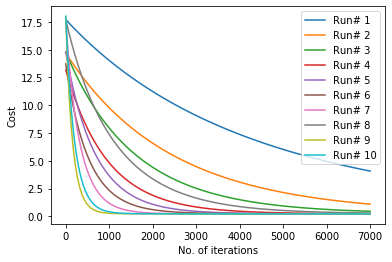

In [8]:
# https://towardsdatascience.com/implementation-of-multi-variate-linear-regression-in-python-using-gradient-descent-optimization-b02f386425b9

import numpy as np
import matplotlib.pyplot as plt
import random
from random import gauss
from numpy.random import rand
from numpy.random import seed

def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h
# ======================================
def thetas_initializing(ln):
    r = random.randint(0, 10)
    print('The seed for random thetas initializing: ', r)
    seed(r)
    return rand(ln)
# ======================================
data = np.loadtxt('winequality-red.csv', delimiter=',')
X_train = data[:,0:10] #feature set
y_train = data[:,11] #label set
# print(X_train)
# print(y_train)
# ======================================
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = thetas_initializing(n+1)
    print('Thetas initial vector:', theta)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
#         print('i#:', i, "\t::θ's:", theta, '\t::cost:', cost[i], '\n')
    theta = theta.reshape(1,n+1)
    return theta, cost
# ======================================
mean = np.ones(X_train.shape[1])
std = np.ones(X_train.shape[1])
for i in range(0, X_train.shape[1]):
    mean[i] = np.mean(X_train.transpose()[i])
    std[i] = np.std(X_train.transpose()[i])
    for j in range(0, X_train.shape[0]):
        X_train[j][i] = (X_train[j][i] - mean[i])/std[i]


# ======================================
# calling the principal function with learning_rate and num_iters 
# num_iters = 30000
# rate =  0.00017

# theta, cost = linear_regression(X_train, y_train, rate, num_iters)
# print('COST:', cost[num_iters-1])
# print('Thetas', theta)
# print('Last 10 costs', cost[-10:])
# # draw cost vs iteration for all
# cost = list(cost)
# n_iterations = [x for x in range(1,num_iters+1)]
# plt.plot(n_iterations, cost, label = "#of iters" + str(num_iters) + ", rate" + str(rate))
# plt.xlabel('No. of iterations')
# plt.ylabel('Cost')
# plt.legend(loc='upper right')

# the_10_iters = [100, 500, 1000, 1500, 3000]
the_10_rates = [0.0001, 0.0002, 0.0003, 0.0005, 0.0007, 0.0009, 0.0014, 0.0004, 0.003, 0.0023]

# Perform the 10 different runs with different starting points
for i in range(len(the_10_rates)):
    print("Run#:",i+1)
    num_iters = 7000# the_10_iters[i]
    rate =  the_10_rates[i]
    theta, cost = linear_regression(X_train, y_train, rate, num_iters)
    print('COST:', cost[num_iters-1])
    print('Thetas', theta)
    print('Last 10 costs', cost[-10:])
    print('====================================================================')
    # draw cost vs iteration for all
    cost = list(cost)
    n_iterations = [x for x in range(1,num_iters+1)]
    plt.plot(n_iterations, cost, label = "Run# " + str(i+1))
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')
    plt.legend(loc='upper right')
    